In [ ]:
import numpy as np
from tqdm.notebook import tqdm

c_main = '#003f5c'
c_comp = '#ffbf00'
c_grey = '#a3a3a3'

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', [c_main, c_comp], N=250)  # N is the number of discrete colors

# example colors
colors = cmap(np.linspace(0, 1, 10))

golden_ratio = (1 + 5 ** 0.5) / 2  # Approximately 1.618
width = 5
height = width / golden_ratio

def put_label(ax, label):
    ax.text(0, 1.1, label, transform=ax.transAxes,
           fontsize=16, fontweight='bold', va='top', ha='left')

# CRLB

## Fig XXX

In [ ]:
from andi_datasets.analysis import (fisher_information_alpha,
                                    fisher_information_matrix,
                                    fisher_information_K_alpha
)

from andi_datasets.models_phenom import models_phenom
from andi_datasets.analysis import msd_analysis

In [ ]:
# Example parameters
alphas = np.linspace(0.1, 1.9, 50)
T = 100  # Length of the trajectory
K_alpha = 5

var_a_k = np.array([1/fisher_information_alpha(alpha, T) for alpha in alphas])
var_a_uk = np.array([fisher_information_matrix(alpha, K_alpha, T)[1][0,0] for alpha in alphas])



var_d_uka = np.array([fisher_information_matrix(alpha, K_alpha, T)[1][-1,-1] for alpha in alphas])

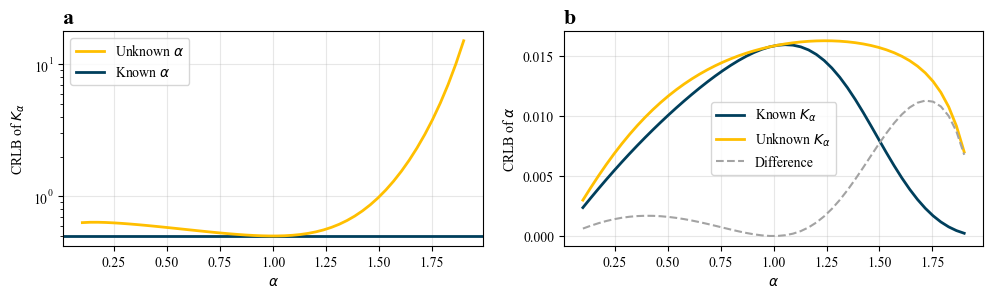

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (2*width, height), tight_layout = True)
ax[1].plot(alphas, var_a_k, c = c_main, lw = 2, label = r'Known $K_\alpha$')
ax[1].plot(alphas, var_a_uk, c = c_comp, lw = 2, label = r'Unknown $K_\alpha$')

ax[1].plot(alphas, var_a_uk-var_a_k, c = c_grey, ls = '--', label = 'Difference')
ax[1].grid(alpha = 0.3)
ax[1].set_xlabel(r'$\alpha$')
ax[1].set_ylabel(r'CRLB of $\alpha$')
ax[1].legend()


ax[0].semilogy(alphas, var_d_uka, c = c_comp, lw = 2, zorder = 10, label = r'Unknown $\alpha$',)
ax[0].axhline(1/fisher_information_K_alpha(K_alpha, T), c = c_main, label = r'Known $\alpha$', lw = 2)

ax[0].grid(alpha = 0.3)
ax[0].set_xlabel(r'$\alpha$')
ax[0].set_ylabel(r'CRLB of $K_\alpha$')
ax[0].legend()


put_label(ax[0], 'a')
put_label(ax[1], 'b')

plt.savefig('/home/gorka/overleaf/book_andi/figures/crlb_fbm.pdf', bbox_inches='tight', pad_inches = 0, transparent = True)

# MSD

## Box XX

We will compute here the diffusion coefficient $D$ of a set of Brownian trajectories via the tMSD and show that the standard deviation $S$ of such estimator converges to $S(D)/D = 6/T$, where $T$ is the length of the trajectory

In [ ]:
from andi_datasets.analysis import msd_analysis

In [ ]:
T_max = int(1e3) # Maximum lenght to consider
Ts = np.logspace(1, 3, 20).astype(int) # Lengths to calculat the CRLB
N = int(1e4) # Number of trajectories

# Diffusion coefficient. Because we will calculate S(D) / D, the results won't depend on D, feel free to check that.
D = 5
# Generate a set of BM trajectories
bm_trajs = np.sqrt(2*D)*np.random.randn(N, T_max, 1).cumsum(1)

# Array where to save the standard deviations
std_T = np.zeros_like(Ts).astype(float)

# Now we loop throughs the chosen lenghts
for idxT, T in enumerate(tqdm(Ts)):

    # We cut the trajectories to length T
    bm_trajs_T = bm_trajs[:, :T]

    # Now we extract the diffusion coefficient. The following function first computes the tMSD with the given
    # t_lags (which are the optimal ones for a BM trajectory). Then it performs a linear fit of the tMSD to 
    # obtain D as its slope.
    pred_Ds = msd_analysis().get_diff_coeff(trajs = bm_trajs_T, 
                                            t_lags = [1,2])

    # Now we calculate the standard deviation of this predictions
    std_T[idxT] = pred_Ds.std()

  0%|          | 0/20 [00:00<?, ?it/s]

Text(0.5, 0, 'Trajectory length')

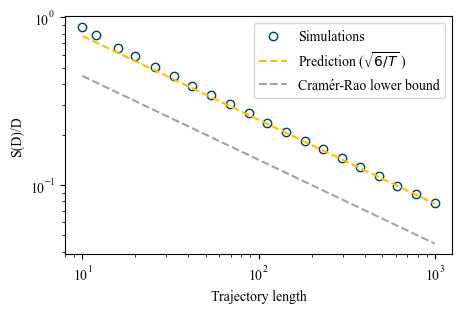

In [ ]:
# Finally, we plot the results, as well as the theoretical prediction sqrt(6/T) and the CRLB sqrt(2/T)
plt.figure(figsize = (width, height))
plt.scatter(Ts, std_T / D, edgecolor = c_main, label = 'Simulations', facecolor = 'w')
plt.loglog(Ts, np.sqrt(6/Ts), c = c_comp, ls = '--', label = 'Prediction ($\sqrt{6/T}$ )')
plt.plot(Ts, np.sqrt(2/Ts), c = c_grey, ls = '--', label = 'Cramér-Rao lower bound')
plt.legend()
plt.ylabel('S(D)/D')
plt.xlabel('Trajectory length')

## Fig XXX

In [ ]:
from andi_datasets.analysis import msd_analysis

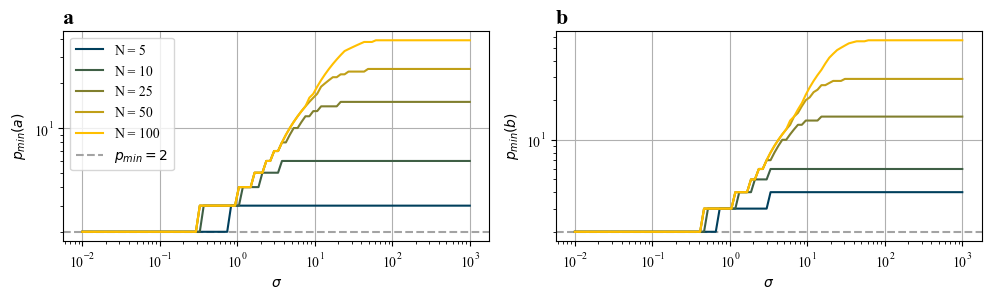

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (2*width, height), tight_layout = True)

R = 0; D = 1; delta_t = 1;
sigmas = np.logspace(-2,3, 100)
xs = msd_analysis()._get_reduced_loc_error(sigma = sigmas, D = D, R = R, deltaT = delta_t)

Ns = [5,10,25,50,100]

colors = cmap(np.linspace(0, 1, len(Ns)))

for idxN, N in enumerate(Ns):
    opt_p = np.array([msd_analysis().get_optimal_tlags(x, N) for x in xs])    

    ax[0].loglog(sigmas, opt_p[:,0], c = colors[idxN], label = f'N = {N}')
    ax[1].loglog(sigmas, opt_p[:,1], c = colors[idxN])

for a in ax: a.axhline(2, c = c_grey, ls = '--', zorder = -1, label = r'$p_{min} = 2$')

ax[0].legend()
ax[0].grid()
ax[0].set_ylabel(r'$p_{min}(a)$')
ax[0].set_xlabel(r'$\sigma$')

ax[1].grid()
ax[1].set_ylabel(r'$p_{min}(b)$')
ax[1].set_xlabel(r'$\sigma$')

put_label(ax[0], 'a')
put_label(ax[1], 'b')
    
plt.savefig('/home/gorka/overleaf/book_andi/figures/pmin.pdf', bbox_inches='tight', pad_inches = 0, transparent = True)                  